# Tunning Xtrem Gradient Boosting Regression

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data

from sklearn.model_selection import train_test_split

X = pd.read_csv('../data/xtrain.csv')
y = pd.read_csv('../data/ytrain.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_control = pd.read_csv('../data/xtest.csv')
y_control = pd.read_csv('../data/ytest.csv')

In [3]:
from sklearn.metrics import r2_score

def get_r2(model, train=True):

    model.fit(X_train, y_train)
    if train:
        train_pred = model.predict(X_train)
        return r2_score(y_train, train_pred)
    else:
        test_pred = model.predict(X_test)   
        return r2_score(y_test, test_pred)


def create_plot(name, iterator, train, test):

    plt.plot(iterator, train_results, '#ff9900', label='Train R2')
    plt.plot(iterator, test_results, '#ffc1de', label='Test R2')
    plt.title(f'R2 vs {name}')
    plt.legend()
    plt.ylabel('$R^2$')
    plt.xlabel(f'{name}')
    plt.show()


def create_table(name, iterator, train, test):

    results = pd.DataFrame()
    results[name] = iterator
    results['TrainScore'] = train_results
    results['TestScore'] = test_results
    return results

In [4]:
from xgboost import XGBRegressor

#### Learning rate

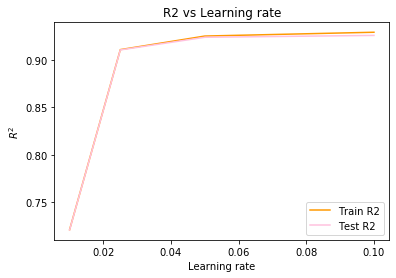

In [7]:
# Find best learning rate

learning_rates = [0.01, 0.025, 0.05, 0.1]
name = 'Learning rate'

# Get scores and plot
train_results = []
test_results = []
for value in learning_rates:
    model = XGBRegressor(learning_rate=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_lr = create_table(name, learning_rates, train_results, test_results)
create_plot(name, learning_rates, train_results, test_results)

In [8]:
result_lr

,Learning rate,TrainScore,TestScore
0,0.010,0.721040,0.720799
1,0.025,0.910873,0.910551
2,0.050,0.925188,0.923887
3,0.100,0.929196,0.925855


Conclusiones:
*   El mejor learning rate se da con 0.1. Este es el màximo valor para obtener resutados correctos segun Friedman

#### Number of trees

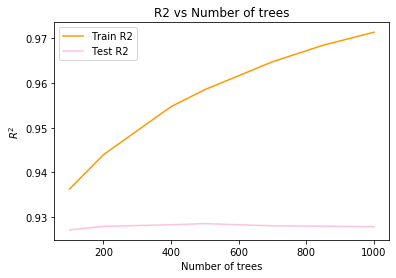

In [13]:
# Find best learning rate

# Friedma (1999) 
n_estimators = [100, 200, 400, 500, 700, 850, 1000]
name = 'Number of trees'
param = n_estimators

# Get scores and plot
train_results = []
test_results = []
for value in param:
    model = XGBRegressor(n_estimators=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_nt = create_table(name, param, train_results, test_results)
create_plot(name, param, train_results, test_results)

In [14]:
result_nt

,Number of trees,TrainScore,TestScore
0,100,0.936280,0.927139
1,200,0.943958,0.927938
2,400,0.954700,0.928290
3,500,0.958509,0.928542
4,700,0.964744,0.928060
5,850,0.968447,0.927981
6,1000,0.971344,0.927846


Conclusión:
*   Al aumentar el número de estimadores, se incrementa el overfittong, por lo que este se seteara a el valor mínimo recomendado de 100

#### Booster

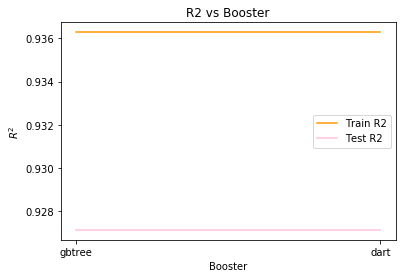

In [17]:
# Booster
booster = ['gbtree', 'dart']
name = 'Booster'
param = booster

# Get scores and plot
train_results = []
test_results = []
for value in param:
    model = XGBRegressor(booster=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_bo = create_table(name, param, train_results, test_results)
create_plot(name, param, train_results, test_results)

In [16]:
result_bo

,Booster,TrainScore,TestScore
0,gblinear,-3.553909e+27,-9.200976e+30
1,gbtree,9.362800e-01,9.271392e-01
2,dart,9.362800e-01,9.271392e-01


El booster de tipo linear incurre en un muy alto bias, por lo que los mejores métdos son los basados en árboles o en dart, teniendo un desempeño identico.

#### Trhee method

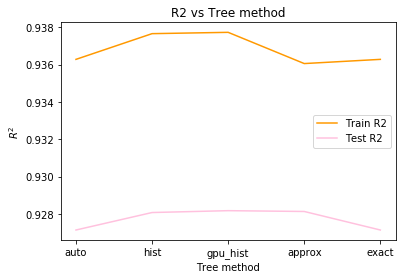

In [25]:
# Tree method

tree_method = ['auto', 'hist', 'gpu_hist', 'approx', 'exact']
name = 'Tree method'
param = tree_method

# Get scores and plot
train_results = []
test_results = []
for value in param:
    model = XGBRegressor(tree_method=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_tm = create_table(name, param, train_results, test_results)
create_plot(name, param, train_results, test_results)

In [23]:
result_tm

,Tree method,TrainScore,TestScore
0,auto,0.936280,0.927139
1,hist,0.937657,0.928076
2,gpu_hist,0.937728,0.928179
3,approx,0.936055,0.928132
4,exact,0.936280,0.927139


Conclusiín:
*   El mejor método para construir el algoritmo es el de hist_gpu

#### Regression methods

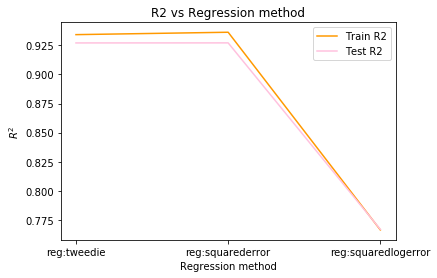

In [29]:
# Objective

objective = ['reg:tweedie', 'reg:squarederror','reg:squaredlogerror']
name = 'Regression method'
param = objective

# Get scores and plot
train_results = []
test_results = []
for value in param:
    model = XGBRegressor(objective=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_rm = create_table(name, param, train_results, test_results)
create_plot(name, param, train_results, test_results)

In [30]:
result_rm

,Regression method,TrainScore,TestScore
0,reg:tweedie,0.934223,0.927092
1,reg:squarederror,0.936280,0.927139
2,reg:squaredlogerror,0.766389,0.766868


## Tuning hyperparameters

In [2]:
# Load data

from sklearn.model_selection import train_test_split

X = pd.read_csv('../data/xtrain.csv')
y = pd.read_csv('../data/ytrain.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_control = pd.read_csv('../data/xtest.csv')
y_control = pd.read_csv('../data/ytest.csv')

In [3]:
# Models and params

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()
params = {
    # To perform model
    'learning_rate': [0.1],
    'n_estimators': [100],
    'booster': ['gbtree'],
    'tree_method': ['gpu_hist'],
    # To search best
    'max_depth': [3,4,6,8],
    'subsample': [1, 0.8],
    'colsample_bytree': [1, 0.8, 0.5, 0.4],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [1, 0.1, 0.01],
    'reg_alpha': [1, 0.5, 0.01],
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    verbose=2,
)

In [4]:
gscv.fit(X, y)

V] booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=gpu_hist 
[CV]  booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=gpu_hist, total=   6.4s
[CV] booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=gpu_hist 
[CV]  booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=gpu_hist, total=   6.4s
[CV] booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=gpu_hist 
[CV]  booster=gbtree, colsample_bytree=0.4, learning_rate=0.1, max_depth=8, m

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [1, 0.8, 0.5, 0.4],
                         'learning_rate': [0.1], 'max_depth': [3, 4, 6, 8],
                         'min_child_weight': [1, 3, 5], 'n_

In [5]:
# Results
print('='*100)
print('Best Score:', gscv.best_score_)
print('Best params:', gscv.best_params_)
print('\nBest estimator', gscv.best_estimator_)
print('='*100)

Best Score: 0.928672444631103
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1, 'tree_method': 'gpu_hist'}

Best estimator XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=False, verbosity=None)


In [6]:
BestXGBR = XGBRegressor(
    booster='gbtree',
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=8,
    min_child_weight=1,
    n_estimators=100,
    reg_alpha=1,
    reg_lambda=1,
    subsample=1,
    tree_method='gpu_hist'
)

BestXGBR.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=False, verbosity=None)

In [8]:
from sklearn.metrics import r2_score

prediction = BestXGBR.predict(X)
score = r2_score(y, prediction)

control_prediction = BestXGBR.predict(X_control)
control_score = r2_score(y_control, control_prediction)

print('='*100, '\nTrain data')
print('R2 = ', score)
print('='*100)

print('='*100, '\nControl data')
print('R2 = ', control_score)
print('='*100)

Train data
R2 =  0.9383075987594224
Control data
R2 =  0.9298294624173464


In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(
    #booster='gbtree', By default
    #colsample_bytree=1, By default
    max_depth=8,
    #min_child_weight=1, By default
    n_estimators=100,
    reg_alpha=1,
    #reg_lambda=1, By default
    #subsample=1, By default
    tree_method='gpu_hist'
)
params = { 
    'learning_rate': [0.3, 0.2, 0.15, 0.1, 0.095]
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    verbose=1,
)

gscv.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=8, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=1,
                                    reg_lambda=None, scale_pos_weight=None,
                      

In [9]:
# Results
print('='*100)
print('Best Score:', gscv.best_score_)
print('Best params:', gscv.best_params_)
print('\nBest estimator', gscv.best_estimator_)
print('='*100)

Best Score: 0.92986052679187
Best params: {'learning_rate': 0.2}

Best estimator XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=False, verbosity=None)


In [3]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

BestXGBR = XGBRegressor(
    max_depth=8,
    n_estimators=100,
    reg_alpha=1,
    tree_method='gpu_hist',
    learning_rate=0.2
)

BestXGBR.fit(X,y)

prediction = BestXGBR.predict(X)
score = r2_score(y, prediction)

control_prediction = BestXGBR.predict(X_control)
control_score = r2_score(y_control, control_prediction)

print('='*100, '\nTrain data')
print('R2 = ', score)
print('='*100)

print('='*100, '\nControl data')
print('R2 = ', control_score)
print('='*100)

Train data
R2 =  0.946591884301099
Control data
R2 =  0.9315189113585394


In [4]:
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    max_error,
    mean_absolute_error,
    median_absolute_error,
    mean_squared_log_error
) 

prediction[prediction < 0] = 0
control_prediction[control_prediction < 0] = 0

scores = {
    'MSE': mean_squared_error,
    'EVS': explained_variance_score,
    'ME': max_error,
    'MAE': mean_absolute_error,
    'MeAE': median_absolute_error,
    'MSLE': mean_squared_log_error,
    'R2': r2_score
}

for name, score in scores.items():
    print('='*100)
    print('---', name, '---')
    print('Train data')
    print('R2 = ', score(y, prediction))
    print('Control data')
    print('R2 = ', score(y_control, control_prediction))
    print('='*100)

--- MSE ---
Train data
R2 =  5662.826685079239
Control data
R2 =  7259.011966013407
--- EVS ---
Train data
R2 =  0.9466114409419002
Control data
R2 =  0.9315440893247451
--- ME ---
Train data
R2 =  821.3766479492188
Control data
R2 =  881.9281005859375
--- MAE ---
Train data
R2 =  35.20071538028244
Control data
R2 =  39.409881051677864
--- MeAE ---
Train data
R2 =  2.556671380996704
Control data
R2 =  2.607841968536377
--- MSLE ---
Train data
R2 =  0.32274498022065345
Control data
R2 =  0.3434714912418218
--- R2 ---
Train data
R2 =  0.9466098161189559
Control data
R2 =  0.9315431237068746
